# Exploratory Data Analysis

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import cycle

pd.set_option('max_columns', 50)
plt.style.use('bmh')
color_pal=plt.rcParams['axes.prop_cycle'].by_key()['color']
color_cycle=cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

import os
for dirname, _, filenames in os.walk('m5-forecasting-accuracy'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import pywt

m5-forecasting-accuracy/calendar.csv
m5-forecasting-accuracy/sell_prices.csv
m5-forecasting-accuracy/sales_train_validation.csv
m5-forecasting-accuracy/sample_submission.csv


In [3]:
Dir = '../m5-forecasting-data/'
cal_data=pd.read_csv(Dir+'calendar.csv')
salestv_data=pd.read_csv(Dir+'sales_train_validation.csv')
ss_data=pd.read_csv(Dir+'sample_submission.csv')
sellp_data=pd.read_csv(Dir+'sell_prices.csv')

In [4]:
ss_data.head()

,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
0,HOBBIES_1_001_CA_1_validation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,HOBBIES_1_002_CA_1_validation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,HOBBIES_1_004_CA_1_validation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,HOBBIES_1_005_CA_1_validation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
salestv_data.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,...,d_1889,d_1890,d_1891,d_1892,d_1893,d_1894,d_1895,d_1896,d_1897,d_1898,d_1899,d_1900,d_1901,d_1902,d_1903,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,4,2,3,0,1,2,0,0,0,1,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0,0,0,0,1,2,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,3,1,2,1,3,1,0,2,5,4,2,0,3,0,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4,0,1,4,0,1,0,1,0,1,1,2,0,1,1,2,1,1,0,1,1,2,2,2,4


In [6]:
cal_data.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


In [7]:
sellp_data.head()

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


# Data Visualization

### choose random 20 items

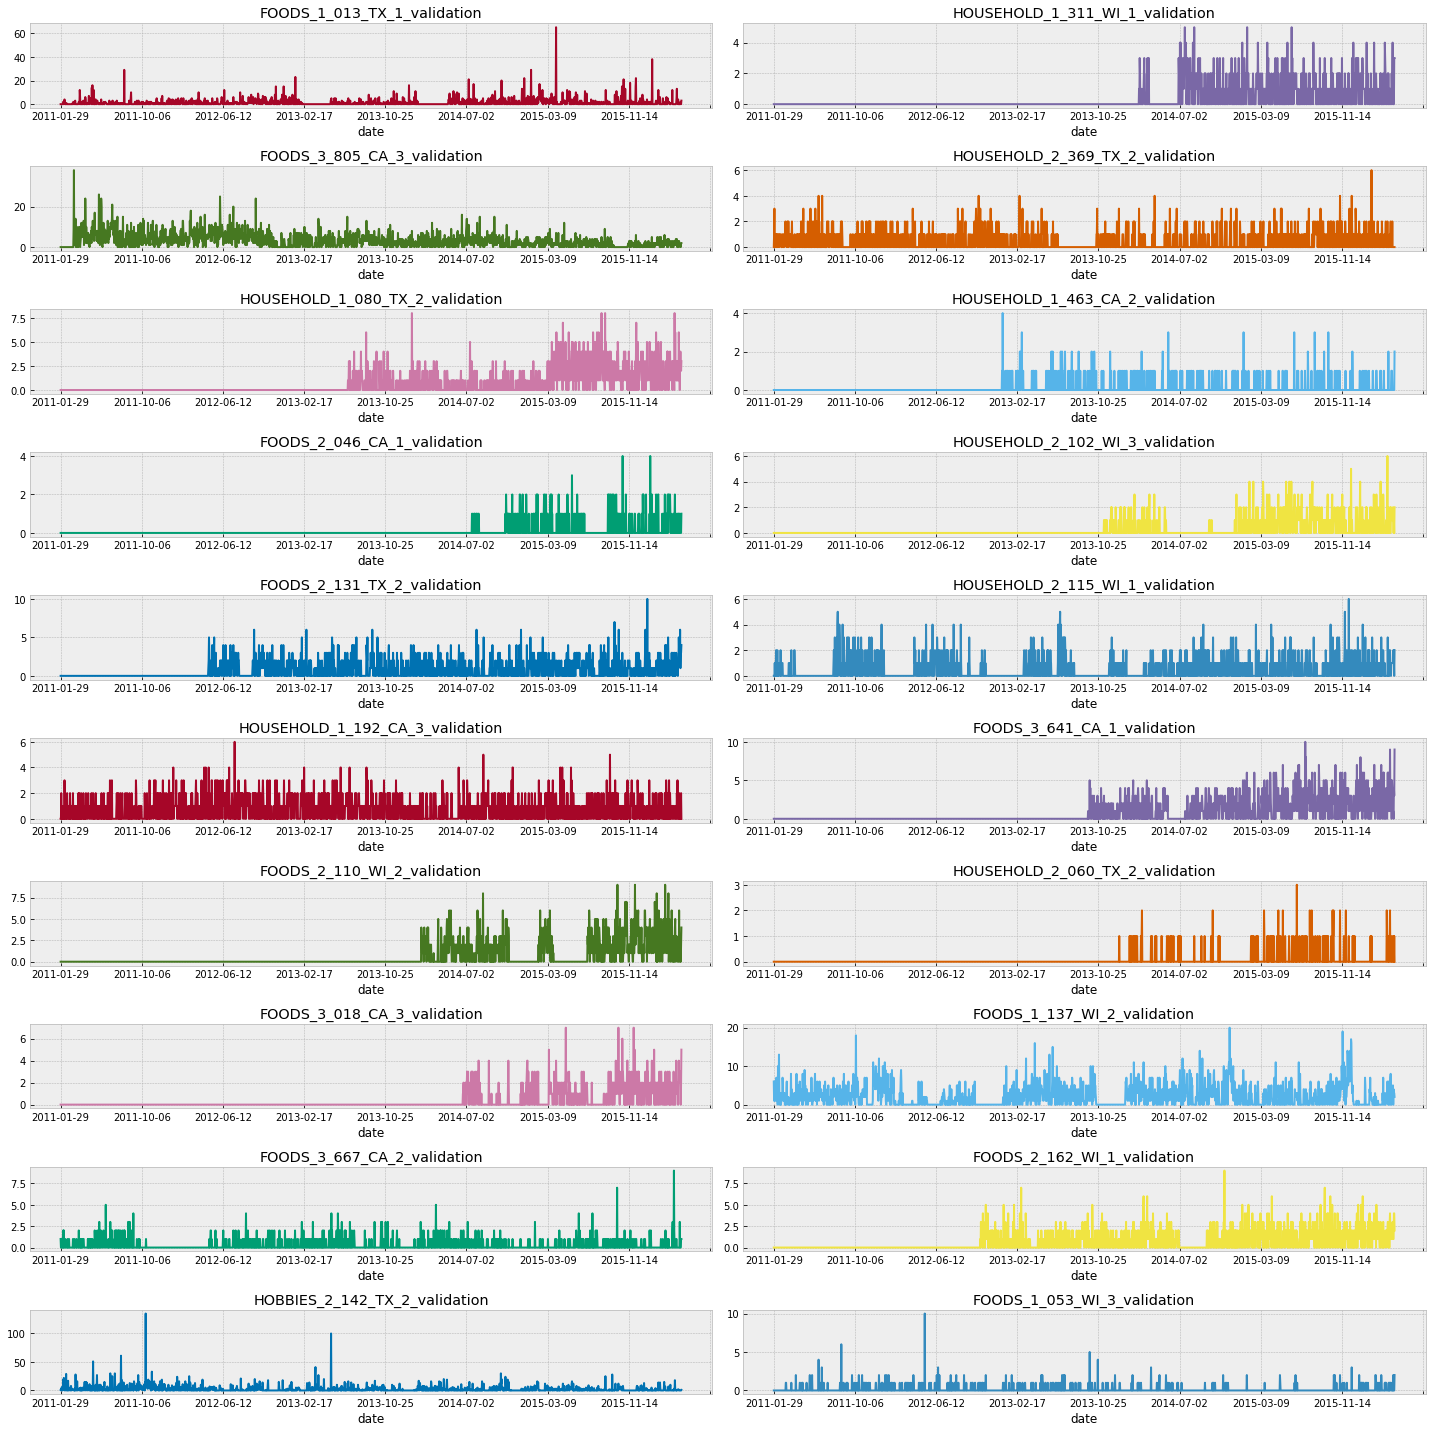

In [20]:
twenty_examples = salestv_data.sample(20, random_state=529) # Sample random 20 samples from the salestv dataframe
list_of_sampled_id = list(twenty_examples['id']) # Extract the list of sampled id of items so as to just keep these id values in the dataframe eventually
twenty_examples = twenty_examples.set_index('id')[d_cols].T # Set the index of dataframe to be id column, select only the d columns & transform the 
twenty_examples = twenty_examples.reset_index().rename(columns={'index':'d'})
twenty_examples = twenty_examples.merge(cal_data)
twenty_examples = twenty_examples.set_index('date')[list_of_sampled_id] 


fig, axs = plt.subplots(10,2,figsize=(20,20))
axs = axs.flatten()

axs_id=0
for item in twenty_examples.columns:
    twenty_examples[item].plot(title=item, color=next(color_cycle), ax=axs[axs_id])
    axs_id+=1
plt.tight_layout()
plt.show()

#### sales data + calendar data

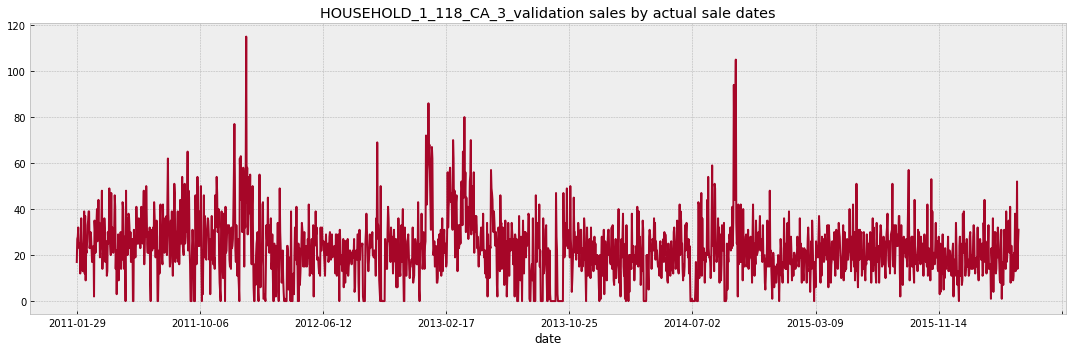

In [11]:
ids = ['FOODS_3_090_CA_3_validation', 'HOBBIES_1_234_CA_3_validation', 'HOUSEHOLD_1_118_CA_3_validation', 'HOBBIES_1_001_CA_1_validation']
examples = []

# General function to extract specific item Id values from sales_train_evaluation dataset
for i in range(len(ids)):
    # Merge calendar date with sales_train_evaluation date
    examples.append(salestv_data.loc[salestv_data['id']== ids[i]][d_cols].T) # Fetch a specific Id and transform it as column
    examples[i] = examples[i].rename(columns={examples[i].columns.values[0] : ids[i]}) # Rename column e.g 8412 (location Id) to the proper name
    examples[i] = examples[i].reset_index().rename(columns={'index':'d'}) # Reset index so, d_cols are not index and then, rename index as d
    examples[i] = examples[i].merge(cal_data) # Merge two dataframe on the bases of column named d


graph_ids = [2]
fig, axs = plt.subplots(len(graph_ids),1,figsize=(15,10)) 
if len(graph_ids) != 1 : axs=axs.flatten() 

ax_id=0
for graph_id in graph_ids:
    # Set date as the index of dataframe to be plotted properly and only fetch specific Id sales value
    examples[graph_id].set_index('date')[ids[graph_id]] \
    .plot(figsize=(15,5), color=next(color_cycle), title= f'{ids[graph_id]} sales by actual sale dates', ax=axs[ax_id] if len(graph_ids)!=1 else axs)
    
    ax_id+=1
plt.tight_layout()
plt.show()


####  Wavelet coefficeints +  discard low coefficients 

In [13]:
# Return Mean absolute deviation value
def maddest(d, axis=None):
    return np.mean(np.absolute(d-np.mean(d,axis)), axis)

# Denoise the signal
def denoise(x, wavelet='db4',level=1):
    coeff = pywt.wavedec(x,wavelet,mode='per')
    sigma=(1/0.6745)*maddest(coeff[-level])
    
    uthresh=sigma*np.sqrt(2*np.log(len(x)))
    coeff[1:]=(pywt.threshold(i,value=uthresh,mode='hard') for i in coeff[1:])
    return pywt.waverec(coeff,wavelet,mode='per')

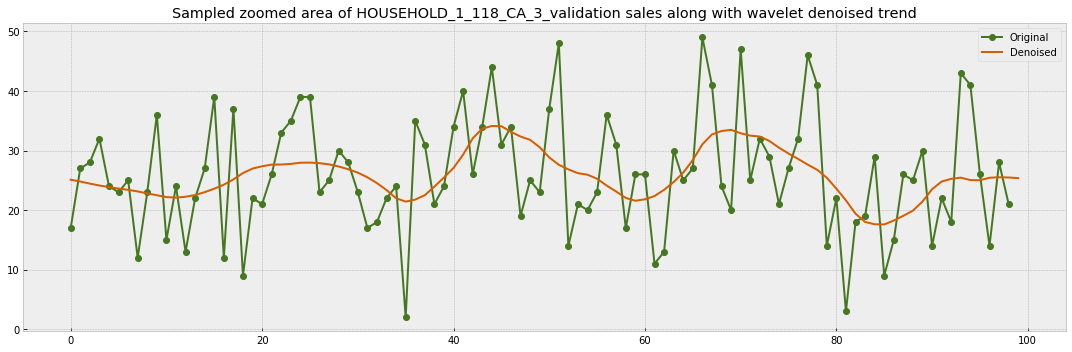

In [14]:
fig, axs = plt.subplots(len(graph_ids),1,figsize=(15,10)) 
if len(graph_ids) != 1 : axs=axs.flatten() 

ax_id=0
for graph_id in graph_ids:
    examples[graph_id][ids[graph_id]][:99].plot(figsize=(15,5),color=next(color_cycle), marker='o', label='Original',
                                                title=f'Sampled zoomed area of {ids[graph_id]} sales along with wavelet denoised trend', ax=axs[ax_id] if len(graph_ids)!=1 else axs)
    list_to_df(denoise(examples[graph_id][ids[graph_id]][:99])).plot(figsize=(15,5),color=next(color_cycle), label='Denoised',
                                                ax=axs[ax_id] if len(graph_ids)!=1 else axs)
    axs[ax_id].legend() if len(graph_ids)!=1 else axs.legend()
    ax_id+=1
    
plt.tight_layout()
plt.show()

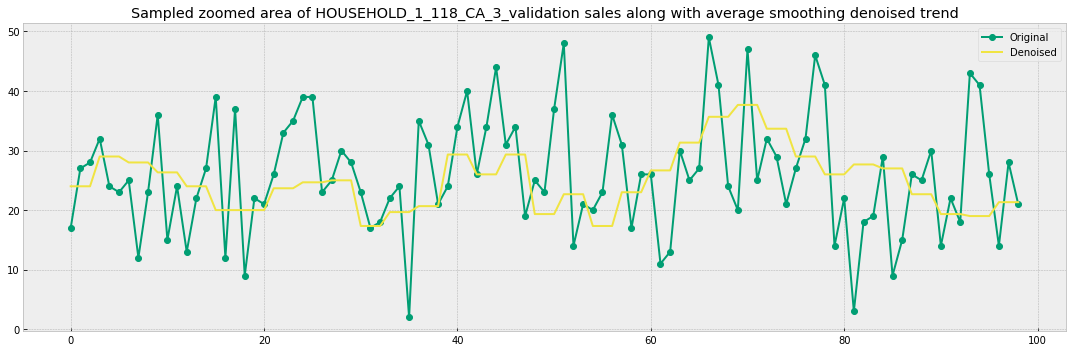

In [17]:
fig, axs = plt.subplots(len(graph_ids),1,figsize=(15,10)) 
if len(graph_ids) != 1 : axs=axs.flatten() 

ax_id=0
for graph_id in graph_ids:
    examples[graph_id][ids[graph_id]][:99].plot(figsize=(15,5),color=next(color_cycle), marker='o', label='Original',
                                                title=f'Sampled zoomed area of {ids[graph_id]} sales along with average smoothing denoised trend', ax=axs[ax_id] if len(graph_ids)!=1 else axs)
    list_to_df(average_smoothing(examples[graph_id][ids[graph_id]])[:99]).plot(figsize=(15,5),color=next(color_cycle), label='Denoised',
                                                ax=axs[ax_id] if len(graph_ids)!=1 else axs)
    axs[ax_id].legend() if len(graph_ids)!=1 else axs.legend()
    ax_id+=1
    
plt.tight_layout()
plt.show()

#### sales data groupby week, month, year

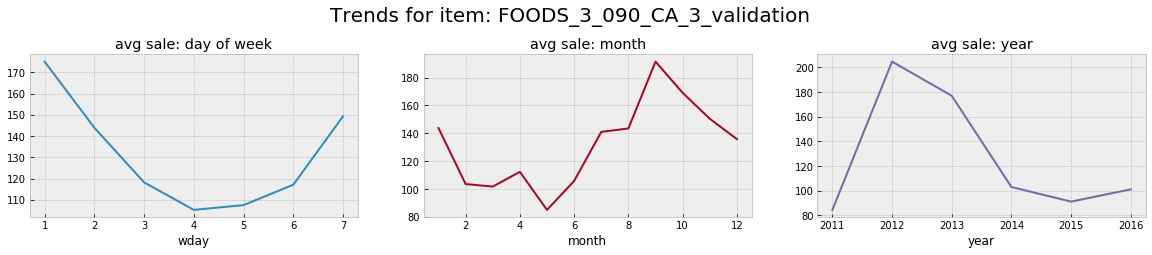

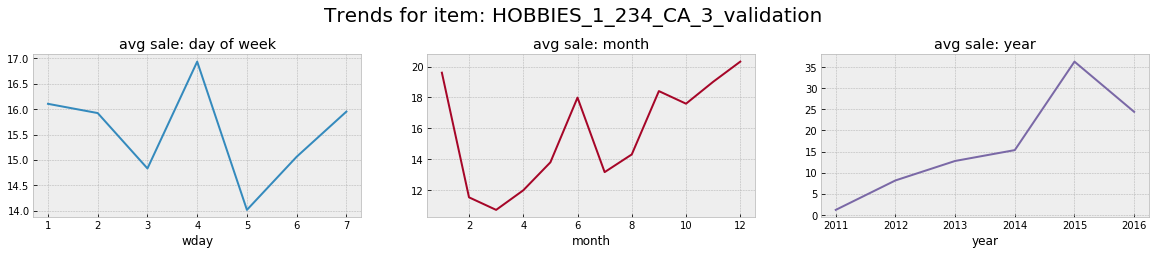

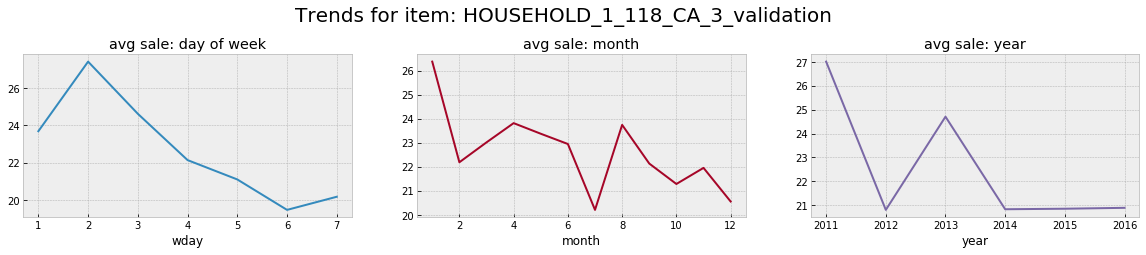

In [19]:
for i in [0, 1, 2]:
    fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(20,3))
    # Groupby wday colum and do mean or count etc. to values of other columns & then, extract the specific sales Id column  
    examples[i].groupby('wday').mean()[ids[i]] \
    .plot(kind='line', title='avg sale: day of week', color=color_pal[0], ax=ax1)
    
    examples[i].groupby('month').mean()[ids[i]] \
    .plot(kind='line', title='avg sale: month', color=color_pal[1], ax=ax2)
    
    examples[i].groupby('year').mean()[ids[i]] \
    .plot(kind='line', title='avg sale: year', color=color_pal[2], ax=ax3)
    
    fig.suptitle(f'Trends for item: {ids[i]}', size=20, y=1.1)

# Sales by store category

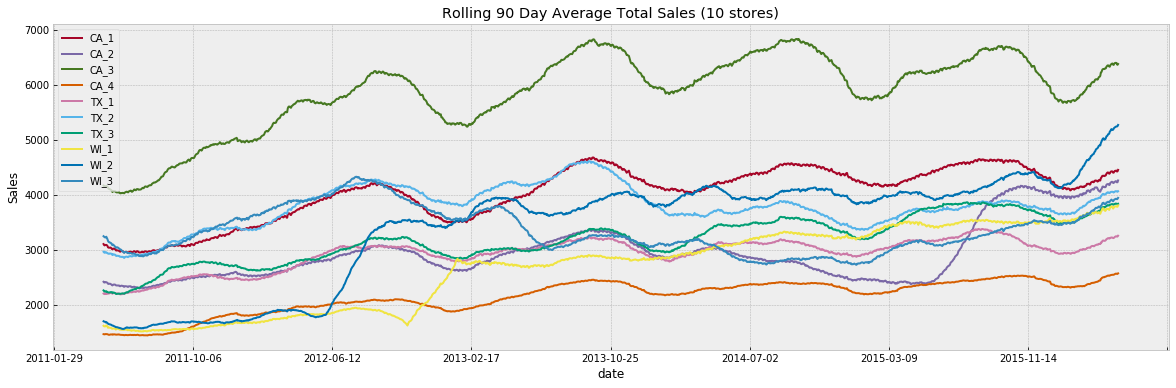

In [24]:
#past_sales_store = salestv_data.groupby('store_id').sum().T \
#.merge(cal_data.set_index('d')['date'], left_index=True, right_index=True).set_index('date')

store_list = sellp_data['store_id'].unique()
for i in store_list:
    # Rolling 90 day average of sales 
    store_items = [c for c in past_sales_item.columns if i in c]
    past_sales_item[store_items].sum(axis=1).rolling(90).mean() \
    .plot(kind='line', figsize=(20,6), color=next(color_cycle), title='Rolling 90 Day Average Total Sales (10 stores)')

plt.ylabel('Sales')
plt.legend(store_list)
plt.show()

Mean sales of store 

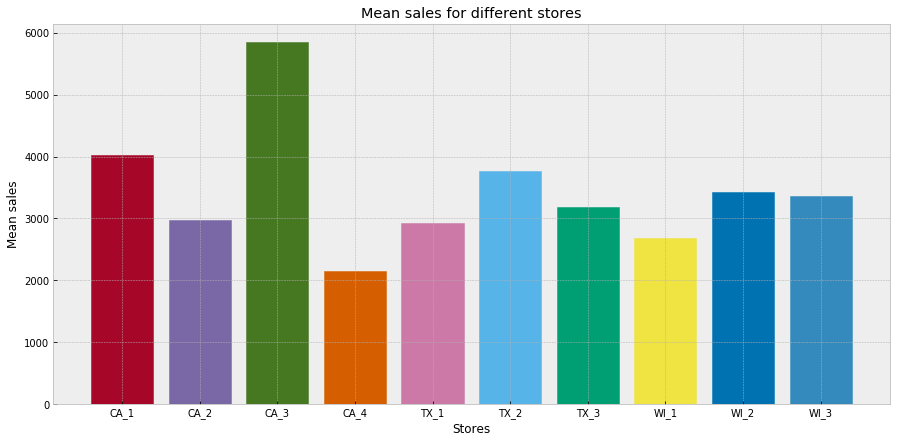

In [27]:
mean_value_store = []
for s in store_list:
    store_items = [c for c in past_sales_item if s in c]
    mean_value_store.append(np.mean(past_sales_item[store_items].sum(axis=1)))

plt.figure(figsize=(15,7))
bplot = plt.bar(store_list,mean_value_store)

#fill different colors for bar plot
colors = [next(color_cycle) for i in range(0,len(store_list))]
for i, b in enumerate(bplot):
    b.set_color(colors[i])
    
plt.xlabel('Stores')
plt.ylabel('Mean sales')
plt.title('Mean sales for different stores')
plt.show()

In [29]:
salestv_data.groupby('store_id').sum().T \
.merge(cal_data.set_index('d'), left_index=True, right_index=True).set_index('date').groupby('wday').mean()[sellp_data['store_id'].unique()] 

#fig, axs = plt.subplots(5,2,figsize=(20,20))
#axs=axs.flatten()

#for i in data.columns:
#    data[i].plot(color=next(color_cycle))

,CA_1,CA_2,CA_3,CA_4,TX_1,TX_2,TX_3,WI_1,WI_2,WI_3
wday,,,,,,,,,,
1,5064.722628,3981.040146,6722.861314,2395.810219,3451.700730,4505.357664,3678.284672,3642.175182,3974.427007,4130.514599
2,5129.744526,3808.335766,7039.007299,2460.916058,3661.901460,4624.875912,3780.302920,3137.113139,3613.996350,3873.828467
3,3853.578755,2620.098901,5882.446886,2176.714286,2806.963370,3657.630037,3184.633700,2308.813187,3230.150183,3131.937729
4,3410.919414,2449.021978,5379.721612,1999.073260,2584.556777,3279.161172,2874.747253,2244.626374,3159.260073,2987.692308
5,3320.036630,2445.769231,5196.124542,1940.783883,2575.417582,3284.457875,2818.809524,2310.318681,3200.369963,2917.934066
6,3359.666667,2507.120879,5138.490842,1947.967033,2584.772894,3333.161172,2830.736264,2331.842491,3205.183150,2966.065934
7,4022.582418,2985.996337,5573.282051,2092.725275,2804.205128,3708.227106,3110.402930,2861.311355,3559.556777,3507.695971


# Sale prices EDA

1. Sale price of one of the most selling product over the years along different stores

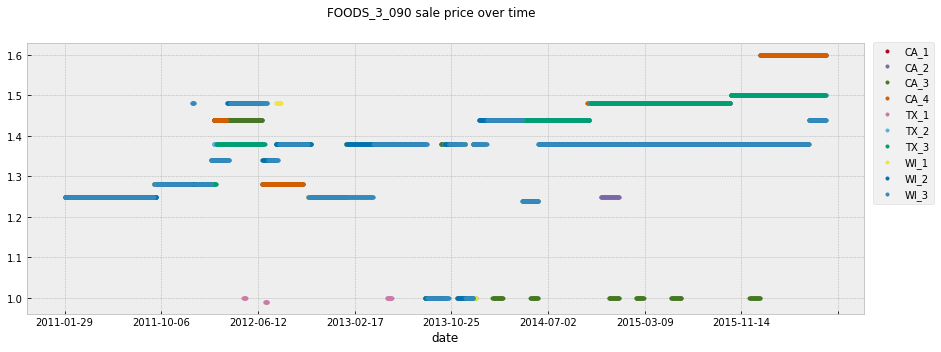

In [30]:
fig, axs = plt.subplots(figsize=(15,5))
stores=[]

for store, d in sellp_data.query('item_id == "FOODS_3_090"').groupby('store_id'):
    # Merge cal_data with wm_yr_wk to plot against actual dates
    merged_d = d.set_index('wm_yr_wk').merge(cal_data.set_index('wm_yr_wk'),left_index=True, right_index=True)
    # Plot the sales over time 
    merged_d.plot(x='date', y='sell_price', color=next(color_cycle), ax=axs, legend=store, style='.')
    stores.append(store)

plt.legend(stores, bbox_to_anchor=(1.09,1.02))
plt.suptitle('FOODS_3_090 sale price over time')
plt.show()

2. Log distribution of sale price for different food categories 

In [31]:
# Add a category column to sellp data 
sellp_data['Category'] = sellp_data['item_id'].apply(lambda x: x.split('_')[0])

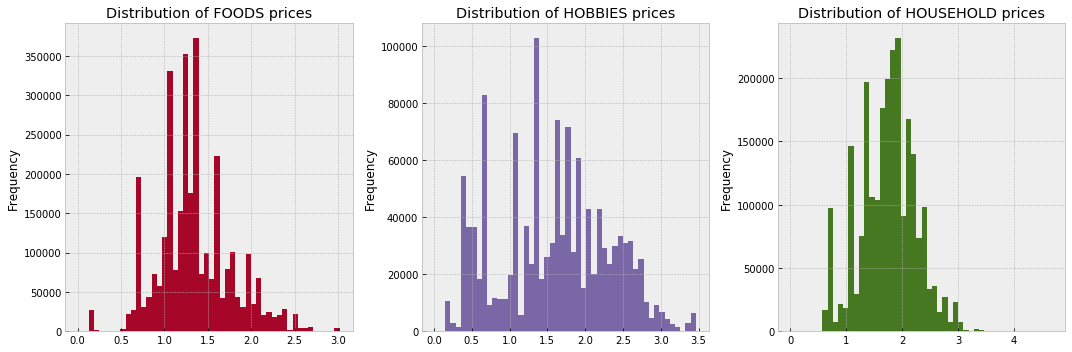

In [32]:
fig, axs = plt.subplots(1,3,figsize=(15,5))
ax_id=0

for cat, d in sellp_data.groupby('Category'):
    # Do the log of values of sell_price columns & plot it's histogram distribution
    d['sell_price'].apply(np.log1p).plot(kind='hist', bins=50,ax=axs[ax_id], color=next(color_cycle), title=f"Distribution of {cat} prices")
    ax_id+=1
        
plt.tight_layout()
plt.show()

# Traditional statistic approach:  Arima Model

In [33]:
train_dataset = salestv_data[d_cols[-100:-30]]
val_dataset = salestv_data[d_cols[-30:]]

print(val_dataset.values)

[[1 1 1 ... 0 1 1]
 [1 1 1 ... 0 0 0]
 [1 0 0 ... 1 1 1]
 ...
 [0 1 1 ... 0 1 0]
 [2 4 3 ... 3 1 3]
 [0 5 7 ... 0 0 0]]


In [34]:
# Utility function to plot graph
def plot_graphs(ids=[0,2], pred=[], pred_value=False):
    fig, axs = plt.subplots(len(ids), 1, figsize=(20,5))
    if len(ids)!=1 : axs = axs.flatten()
    
    if len(ids)==1:
        axs.plot(list(train_dataset.loc[ids[0]].keys()), train_dataset.loc[ids[0]].values)
        axs.plot(list(val_dataset.loc[ids[0]].keys()), val_dataset.loc[ids[0]].values)
        if pred_value and pred.any():
            axs.plot(list(val_dataset.loc[ids[0]].keys()), pred[ids[0]])
        axs.tick_params(axis='x', rotation=90)
    else:
        ax_id=0
        for i in ids:
            axs[ax_id].plot(list(train_dataset.loc[i].keys()), train_dataset.loc[i].values)
            axs[ax_id].plot(list(val_dataset.loc[i].keys()), val_dataset.loc[i].values)
            if pred_value and pred.any():
                axs[ax_id].plot(list(val_dataset.loc[i].keys()), pred[i])
            axs[ax_id].tick_params(axis='x', rotation=90)
            ax_id+=1
    plt.suptitle('Plot of few items with train and validation data respectively')
    plt.tight_layout()
    plt.show()   

    Plot the train & validation data to compare further model predictions 

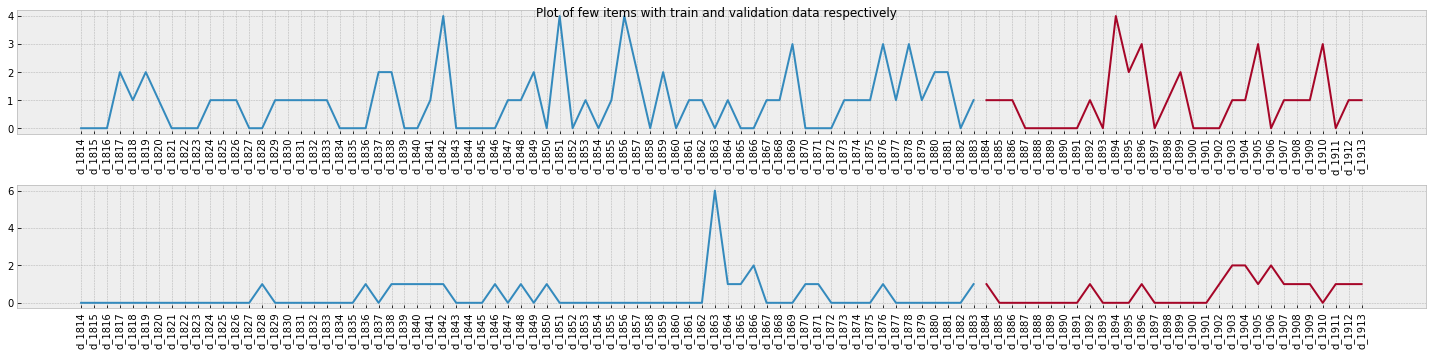

In [35]:
ids = [0, 2]
plot_graphs(ids, [], False)

Moving average - Take past days (like 30) into consideration to predict the future values 

In [38]:
def moving_average(window=30):
    predictions = []
    for i in range(0, len(val_dataset.columns)):
        if i==0:
            predictions.append(np.mean(train_dataset[train_dataset.columns[-window:]].values, axis=1))
        if i>0 and i<=window:
            predictions.append(np.mean(train_dataset[train_dataset.columns[-window+i:]].values, axis=1) + np.mean(val_dataset[val_dataset.columns[:i]].values, axis=1))
        if i>(window+1):
            predictions.append(np.mean(val_dataset[val_dataset.columns[:i]].values, axis=1))
    predictions=np.transpose(np.array([list(row) for row in predictions]))
    error_norm = np.linalg.norm(predictions[:3]-val_dataset[:3]/len(predictions[0]))
    return predictions, float(error_norm)

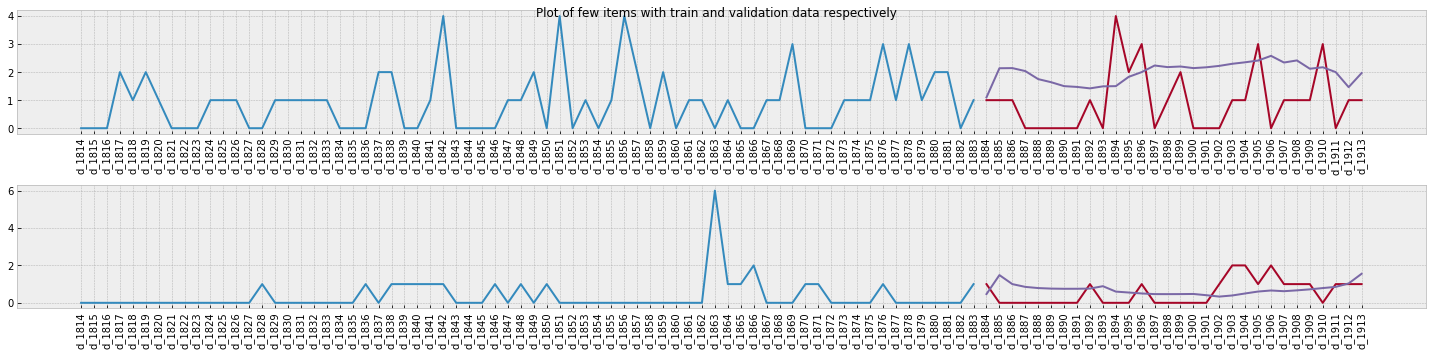

In [39]:
ids=[0, 2]
pred, error_moving = moving_average()
plot_graphs(ids, pred, True)

In [40]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from tqdm.notebook import tqdm as tqdm

In [41]:
def holt_smoothing():
    predictions = []
    for row in tqdm(train_dataset[train_dataset.columns[-30:]].values[:3]):
        fit = Holt(row).fit(smoothing_level=0.3, smoothing_slope=0.01)
        predictions.append(fit.forecast(30))
    predictions=np.array(predictions).reshape(-1,30)
    error_norm = np.linalg.norm(predictions[:3] - val_dataset[:3]/len(predictions[0]))
    return predictions, float(error_norm)

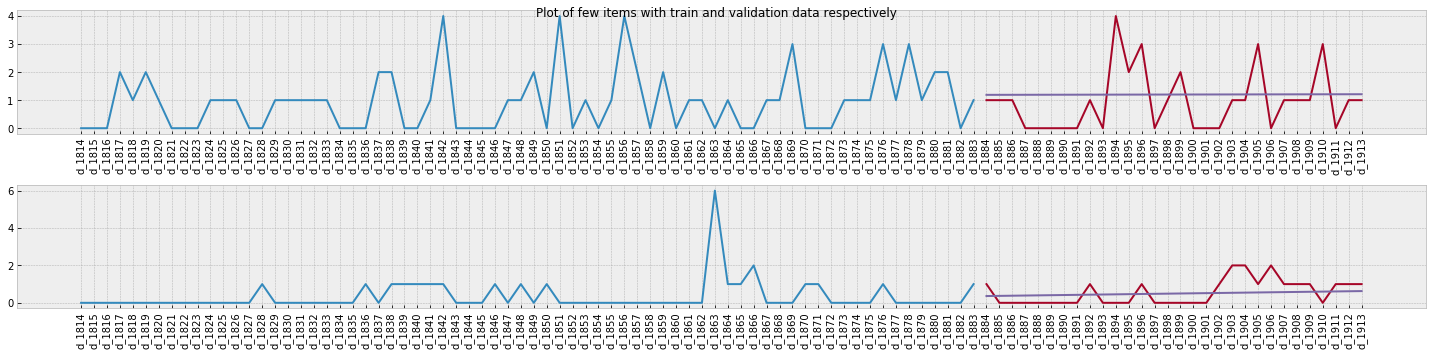

In [42]:
ids = [0, 2]
pred, error_holt= holt_smoothing()
plot_graphs(ids, pred, True)

In [45]:
# Testing for stationarity using dickey fuller's test
from statsmodels.tsa.stattools import adfuller

In [46]:
def adfuller_test(val):
    result = adfuller(val)
    labels = ['ADF test statistics', 'p-value', '#Lags used', 'No of observations used']
    for value, label in zip(result, labels):
        print(label + ':' + str(value))
    if result[1] <= 0.05:
        print('Stationary')
    else:
        print('Non-stationary')

In [47]:
adfuller_test(train_dataset[train_dataset.columns[-30:]].values[2:3][0])

ADF test statistics:-2.3516987258045954
p-value:0.15583549661055118
#Lags used:2
No of observations used:27
Non-stationary


ADF test statistics:-1.2367414008368363
p-value:0.6575942439327376
#Lags used:9
No of observations used:13
Non-stationary


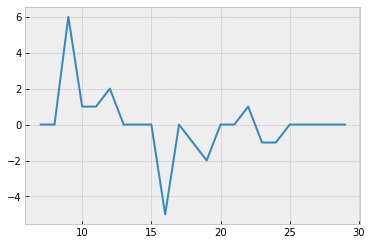

In [48]:
# Differencing to make it stationary
example = (train_dataset[train_dataset.columns[-30:]].loc[2]).reset_index()
example.columns = ['index', 'sales']

# Number by which the seasonality is present, if the seasonal cycle is 1 cycle in 12 months then, we pass 12 
example['seasonal first difference'] = example['sales'] - example['sales'].shift(7) #For us it is 7 
#print(example)
adfuller_test(example['seasonal first difference'].dropna())
example['seasonal first difference'].plot()
plt.show()

In [53]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

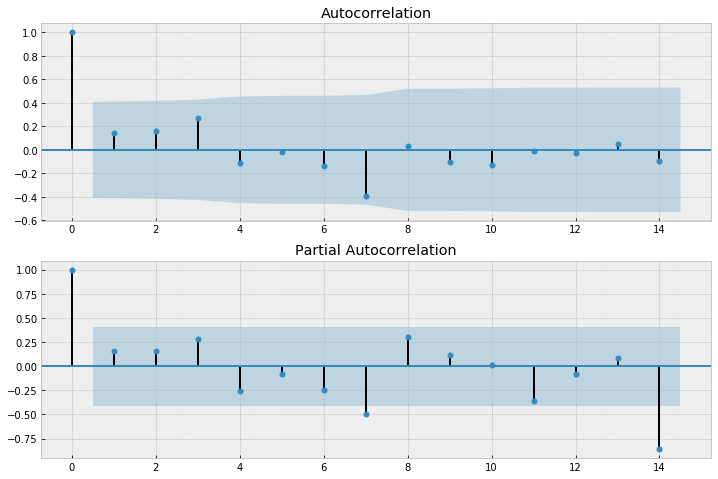

In [61]:
fig = plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(example['seasonal first difference'].dropna(),ax=ax1)
ax2=fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(example['seasonal first difference'].dropna(),ax=ax2)

In [65]:
(train_dataset[train_dataset.columns[-1:]].d_1883.values)

array([1, 1, 1, ..., 2, 1, 2])

In [59]:
def arima():
    predictions = []
    for row in tqdm(train_dataset[train_dataset.columns[-30:]].values[:3]):
        fit = sm.tsa.statespace.SARIMAX(row, seasonal_order=(0,1,1,7)).fit()
        predictions.append(fit.forecast(30))
        print(fit.aic)
    predictions = np.array(predictions).reshape(-1, 30)
    error_norm = np.linalg.norm(predictions[:3]-val_dataset[:3]/len(predictions[0]))
    return predictions, float(error_norm)

/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:1006: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


84.97020193734444
39.3669034161015
87.72709484787109



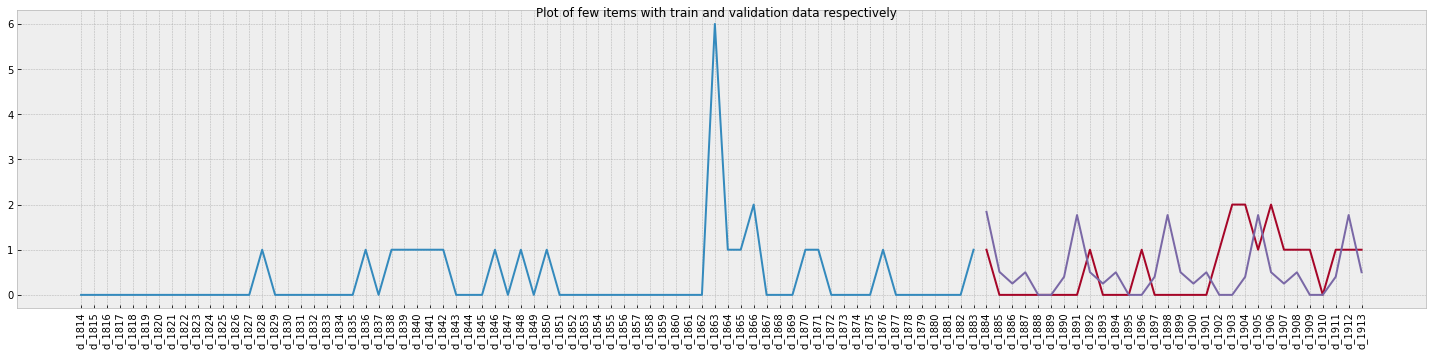

In [60]:
ids = [2]
pred, error_arima = arima()
plot_graphs(ids, pred, True)